In [ ]:
import math
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.preprocessing.sequence import TimeseriesGenerator


In [ ]:
df = yf.download('XLC', start='2018-11-30', end='2022-12-01')
df

[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2018-11-30  45.160000  45.160000  44.639999  45.009998  43.066006   5563500
2018-12-03  45.980000  45.980000  44.900002  45.080002  43.132980   5790400
2018-12-04  45.000000  45.259998  43.650002  43.750000  41.860428   3268000
2018-12-06  43.099998  44.240002  42.970001  44.240002  42.329266   3560400
2018-12-07  44.090000  44.450001  43.209999  43.400002  41.525536   2625800
...               ...        ...        ...        ...        ...       ...
2022-11-23  49.770000  50.590000  49.770000  50.480000  50.012535   4605800
2022-11-25  50.180000  50.450001  50.139999  50.200001  49.735130   1895800
2022-11-28  49.910000  50.205002  49.279999  49.400002  48.942535   3680300
2022-11-29  49.430000  49.549999  48.970001  49.419998  48.962345   3823100
2022-11-30  49.310001  51.525002  49.160000  51.509998  51.032993  10313800

[1007 rows x 6 columns]

Text(0, 0.5, 'Close Prices ($)')

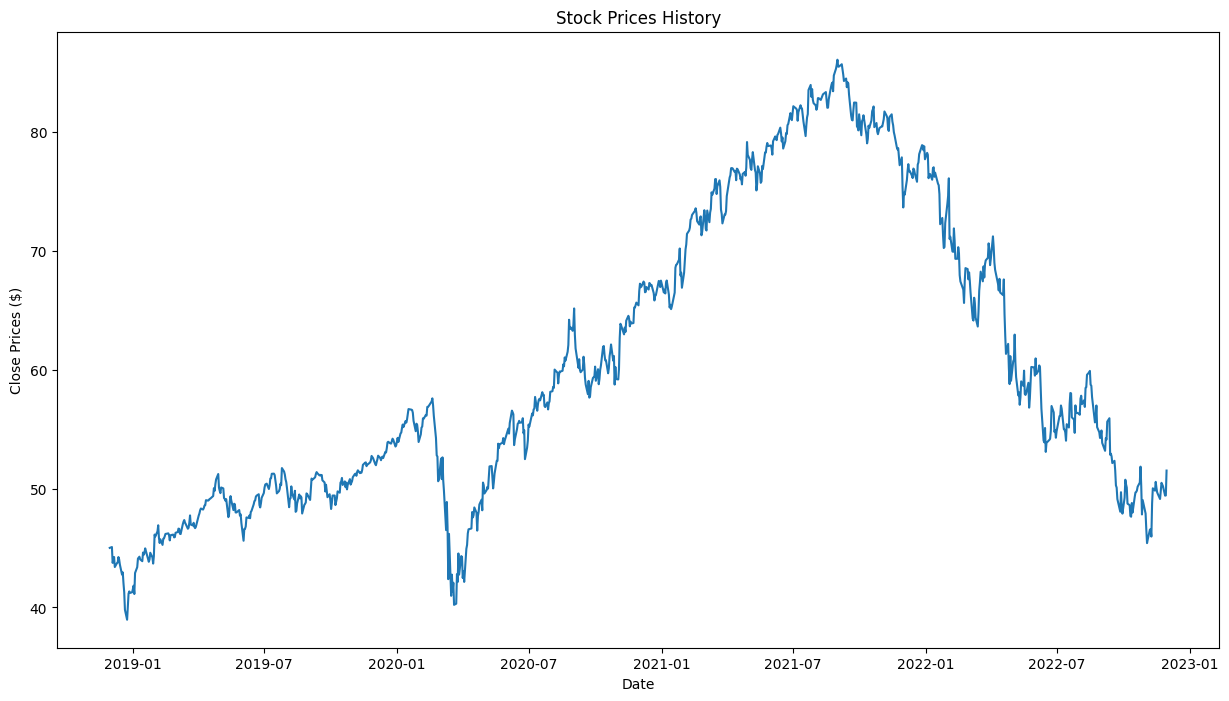

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(df['Close'])
plt.xlabel('Date')

# Plotting the Y Label
plt.ylabel('Close Prices ($)')

In [ ]:
window_size = 252

In [ ]:
close_prices = df['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(window_size, len(train_data)):
    x_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))



In [ ]:
x_train

array([[[0.1282922 ],
        [0.12977911],
        [0.10152928],
        ...,
        [0.29248088],
        [0.2886576 ],
        [0.27803738]],

       [[0.12977911],
        [0.10152928],
        [0.11193713],
        ...,
        [0.2886576 ],
        [0.27803738],
        [0.27591328]],

       [[0.10152928],
        [0.11193713],
        [0.09409516],
        ...,
        [0.27803738],
        [0.27591328],
        [0.28164821]],

       ...,

       [[0.71452842],
        [0.7162277 ],
        [0.72281218],
        ...,
        [0.68394213],
        [0.65760403],
        [0.65696685]],

       [[0.7162277 ],
        [0.72281218],
        [0.7302463 ],
        ...,
        [0.65760403],
        [0.65696685],
        [0.69881054]],

       [[0.72281218],
        [0.7302463 ],
        [0.73470678],
        ...,
        [0.65696685],
        [0.69881054],
        [0.67693275]]])

In [ ]:
y_train

array([0.27591328, 0.28164821, 0.28632113, 0.29290562, 0.2886576 ,
       0.28483431, 0.28993197, 0.29120643, 0.2886576 , 0.29970264,
       0.29864055, 0.30628712, 0.31669497, 0.31775698, 0.31478333,
       0.31457088, 0.32327946, 0.32115544, 0.30926077, 0.31138486,
       0.32476628, 0.31733216, 0.3326253 , 0.33411213, 0.34239589,
       0.34855563, 0.34388271, 0.35492775, 0.3519541 , 0.35768903,
       0.36682243, 0.37616819, 0.37510618, 0.37446892, 0.36958362,
       0.35514012, 0.33666096, 0.35004246, 0.34813081, 0.33623614,
       0.31733216, 0.33092603, 0.34303307, 0.34494472, 0.35960067,
       0.35875104, 0.36576034, 0.36448596, 0.37999148, 0.38020384,
       0.38169067, 0.38976206, 0.39528462, 0.38275276, 0.36427351,
       0.32434154, 0.29354289, 0.2914188 , 0.24723872, 0.25042474,
       0.28780796, 0.25106201, 0.28993197, 0.24915036, 0.23045875,
       0.15994049, 0.21028032, 0.16567542, 0.0724299 , 0.15335593,
       0.04269325, 0.08050121, 0.05033982, 0.06605778, 0.02655

In [ ]:


test_data = scaled_data[training_data_len- window_size: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(window_size, len(test_data)):
  x_test.append(test_data[i-window_size:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM


In [ ]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 252, 100)          40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123751 (483.40 KB)
Trainable params: 123751 (483.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)


Epoch 1/3
554/554 [==============================] - 20s 16ms/step - loss: 0.0060
Epoch 2/3
554/554 [==============================] - 10s 17ms/step - loss: 0.0019
Epoch 3/3
554/554 [==============================] - 10s 18ms/step - loss: 0.0016


In [ ]:
x_train.shape

(554, 252, 1)

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

7/7 [==============================] - 1s 14ms/step


0.44654548227490476

<ipython-input-18-d4202c9d2279>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


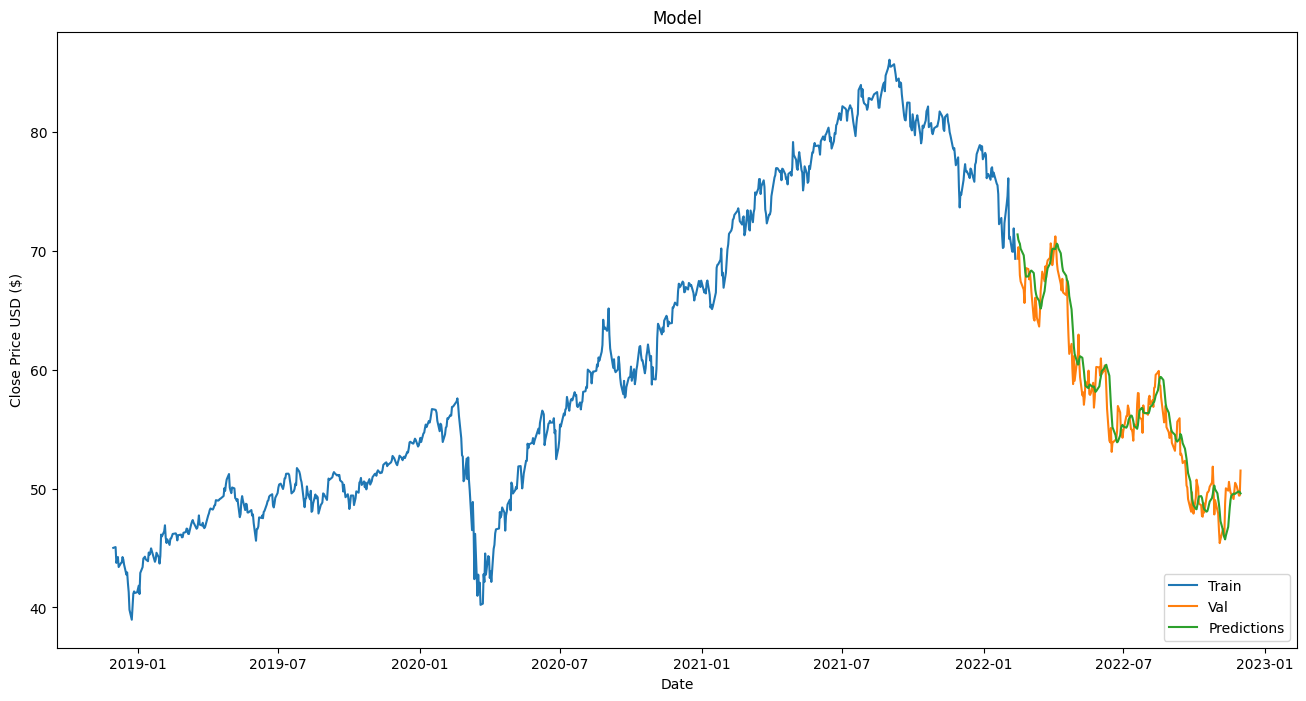

In [ ]:
data = df.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
days = [1, 4, 21, 61, 124]
time = ['1 day', '1 week', '1 month', '3 months', '6 months', '1 year']


def percent_error(actual_price, predicted_price):
  return round((abs(actual_price - predicted_price) / predicted_price * 100), 2)


for i in range(5):

  predicted_price = predictions[days[i]][0]
  actual_price = y_test[days[i]]

  print(f'After {time[i]}')
  predicted_price = round(float(predicted_price), 2)
  actual_price = round(float(actual_price), 2)


  print(f'The Actual Price: {actual_price}')
  print(f'The Predicted Price: {predicted_price}')


  print(f'Percent Error: {percent_error(actual_price, predicted_price)}\n')

  percent_errors = 0

for i in range(len(predictions)):
  predicted_price = predictions[i][0]
  actual_price = y_test[i]

  predicted_price = float(predicted_price)
  actual_price = float(actual_price)

  percent_errors += percent_error(actual_price, predicted_price)

print(f"Average Percent Errors = {round (percent_errors / len(predictions),2)}")

print(f'RMSE = {round(float(rmse),2)}')

After 1 day
The Actual Price: 70.29
The Predicted Price: 70.93
Percent Error: 0.9

After 1 week
The Actual Price: 67.41
The Predicted Price: 70.16
Percent Error: 3.92

After 1 month
The Actual Price: 66.63
The Predicted Price: 65.13
Percent Error: 2.3

After 3 months
The Actual Price: 57.66
The Predicted Price: 59.18
Percent Error: 2.57

After 6 months
The Actual Price: 59.56
The Predicted Price: 57.81
Percent Error: 3.03

Average Percent Errors = 2.41
RMSE = 0.45


In [ ]:
# predictions

In [ ]:
print(x_test.shape)
predictions.shape

(201, 252, 1)


(201, 1)

In [ ]:
print(training_data_len - window_size)
print(training_data_len)

554
806
